In [18]:
from sklearn.cluster import SpectralClustering
import numpy as np
import torch
import matplotlib.pyplot as plt

In [152]:
X = np.array([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])

normalised = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
similarity_matrix = np.dot(normalised, normalised.T)

clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(similarity_matrix)
print(clustering.labels_)

print(similarity_matrix)

[0 1 1 0 0 0]
[[1.         0.9486833  0.70710678 0.96476382 0.9701425  0.9486833 ]
 [0.9486833  1.         0.89442719 0.83205029 0.84366149 0.8       ]
 [0.70710678 0.89442719 1.         0.49613894 0.51449576 0.4472136 ]
 [0.96476382 0.83205029 0.49613894 1.         0.99977373 0.99846035]
 [0.9701425  0.84366149 0.51449576 0.99977373 1.         0.99705449]
 [0.9486833  0.8        0.4472136  0.99846035 0.99705449 1.        ]]


/home/william/Documents/university/National_Gallery_Data_Analysis/gatenlp_venv/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:658: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


[[1 1]
 [2 1]
 [1 0]
 [4 7]
 [3 5]
 [3 6]]


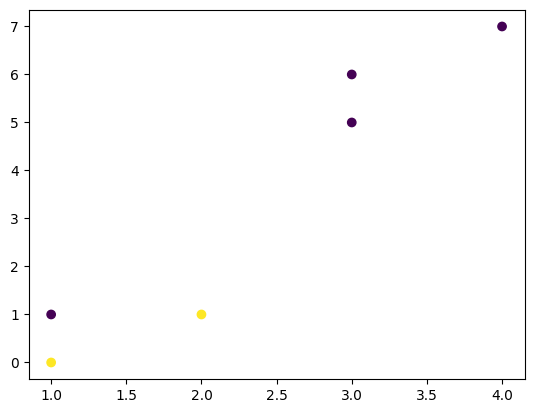

In [153]:
print(X)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()

In [139]:
import torch

X = torch.tensor([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]], dtype=float)

normalised = X / X.norm(dim=1)[:, None]
similarity_matrix = torch.mm(normalised, normalised.transpose(0, 1))

print(similarity_matrix)

tensor([[1.0000, 0.9487, 0.7071, 0.9648, 0.9701, 0.9487],
        [0.9487, 1.0000, 0.8944, 0.8321, 0.8437, 0.8000],
        [0.7071, 0.8944, 1.0000, 0.4961, 0.5145, 0.4472],
        [0.9648, 0.8321, 0.4961, 1.0000, 0.9998, 0.9985],
        [0.9701, 0.8437, 0.5145, 0.9998, 1.0000, 0.9971],
        [0.9487, 0.8000, 0.4472, 0.9985, 0.9971, 1.0000]], dtype=torch.float64)


Compute distance matrix

In [193]:
def kneighbours_graph_t(X, n=3):
    normalised = X / X.norm(dim=1)[:, None]
    similarity_matrix = torch.mm(normalised, normalised.transpose(0, 1))
    knn = similarity_matrix.fill_diagonal_(0).topk(n)

    mask = torch.zeros(similarity_matrix.shape)
    return mask.scatter_(1, knn.indices, 1.)

X = torch.tensor([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]], dtype=float)
print(kneighbours_graph(X, n=1))

tensor([[0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.]])


In [191]:
import matplotlib.cm as cm 
import matplotlib.colors as colors
color_map =  plt.get_cmap('jet')
norm  = colors.Normalize(vmin=-1, vmax=1)
scalarMap = cm.ScalarMappable( norm=norm , cmap=color_map)

torch.Size([500, 500])


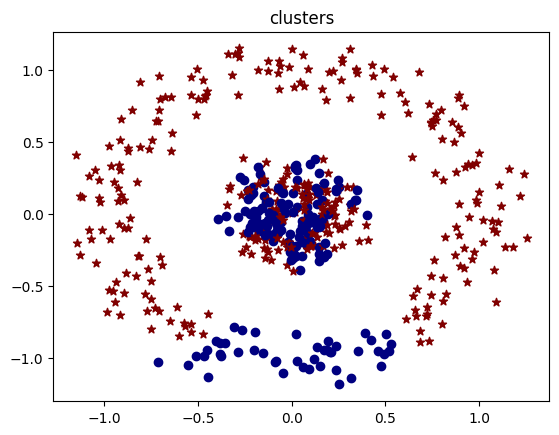

In [204]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph

X, labels = make_circles(n_samples=500, noise=0.1, factor=0.2)
X_t = torch.tensor(X)

A = kneighbours_graph_t(X_t, n=1)


A = torch.tensor(kneighbors_graph(X, 5).toarray())
D = torch.diag(A.sum(dim=1))

L = D - A
print(L.shape)
with torch.no_grad():
	vals, vecs = torch.linalg.eigh(L)

vals = vals.numpy()
vecs = vecs.numpy()

vecs = vecs[:, np.argsort(vals)]
vals = vals[np.argsort(vals)]

clusters = vecs[:, 1] > 0

plt.figure()
plt.title('clusters')
for i, c in enumerate(clusters):
	if c:
		color = scalarMap.to_rgba(-1)
		plt.scatter(X[i,0],X[i,1], color=color,marker='o')
	else:
		color = scalarMap.to_rgba(1)
		plt.scatter(X[i,0],X[i,1], color=color,marker='*')

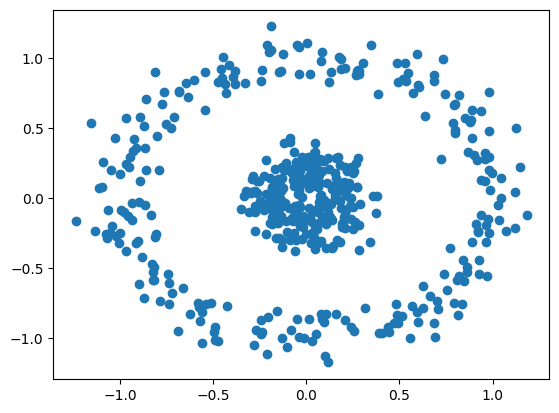

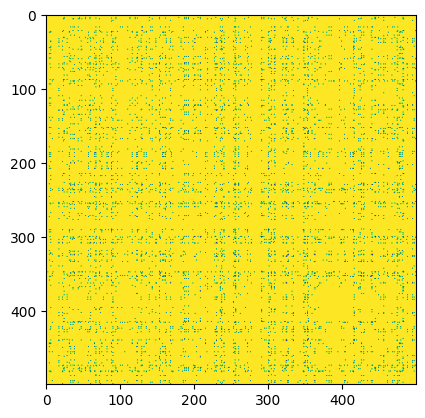

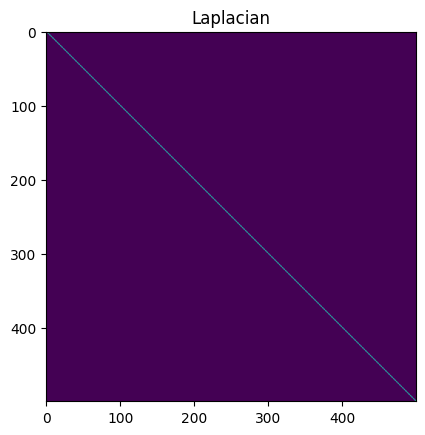

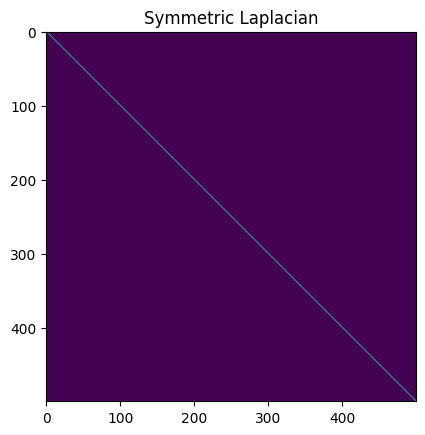

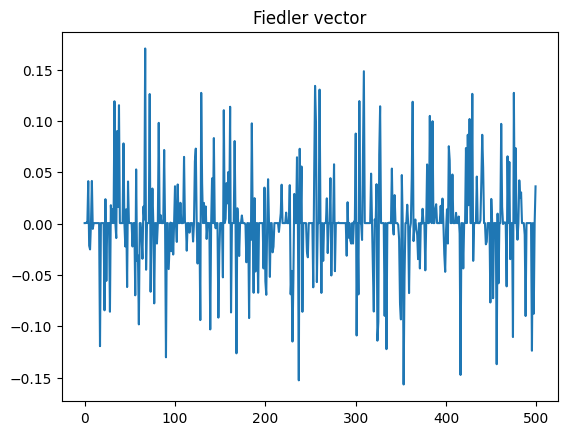

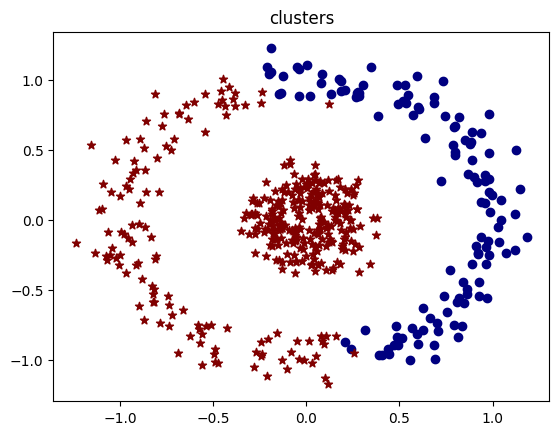

In [192]:
def distance_matrix(mat):
    d= ((mat.unsqueeze (0)-mat.unsqueeze (1))**2).sum (2)**0.5
    return d
 

# Generate Clusters
mat = torch.tensor(make_circles(n_samples=500, noise=0.1, factor=0.2)[0])
plt.scatter(mat[:,0].numpy(),mat[:,1].numpy())
plt.show(block=False)
##-------------------------------------------
#         Compute distance matrix and then the Laplacian
##-------------------------------------------
d= distance_matrix(mat);
da=d<2;
plt.figure()
plt.imshow(da.numpy())
plt.show(block=False)

D= ((da.float()).sum(1)).diag()
L = D -da.float()
plt.figure()
plt.title("Laplacian")
plt.imshow(L.numpy())
plt.show(block=False)



Lsym=torch.mm(torch.mm(torch.diag(torch.pow(torch.diag(D),-0.5)),L),torch.diag(torch.pow(torch.diag(D),-0.5)));
plt.figure()
plt.imshow(Lsym.numpy())
plt.title("Symmetric Laplacian")
plt.show(block=False)


[u,s,v]=torch.svd(Lsym)

# plot fiedler vector

plt.figure()
plt.title('Fiedler vector')
plt.plot(u[:,-2].numpy());
plt.show(block=False)
norm  = colors.Normalize(vmin=-1, vmax=1)

scalarMap = cm.ScalarMappable( norm=norm , cmap=color_map)


plt.figure()
plt.title('clusters')
for i in range(len(u[:,-2])):
	if u[i,-2]<0:
		color = scalarMap.to_rgba(-1)
		plt.scatter(mat[i,0],mat[i,1], color=color,marker='o')
	else:
		color = scalarMap.to_rgba(1)
		plt.scatter(mat[i,0],mat[i,1], color=color,marker='*')